# 8-1. 교차 검정(Cross Validation)
- 발생할 수 있는 과대적합 문제도 피하기 위해서 실시
- 훈련 데이터와 테스트 데이터를 한번 나누어 평가하는 것보다 더 정확
- 원리 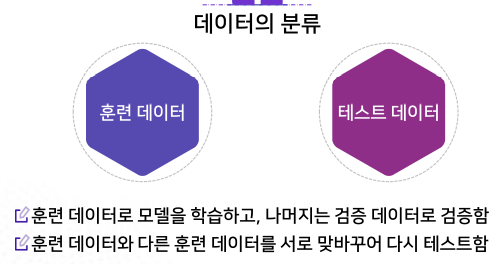
- K-fold 교차검정: 데이터를 k개의 집합으로 나누어 한 개의 집합을 제외하고 나머지를 이용해서 모형을 학습
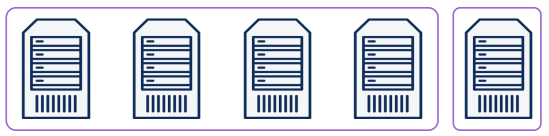
① 제외했던 한 개의 집합으로 정확도를 계산한다.  
② 이 과정을 k개의 집합에 모두 반복 적용하고, k개의 평균을 구한다.  
③ 일반적으로 k값은 '5' 혹은 10으로 사용한다. (보통 5 사용/10은 엄격히 규제하는 것)
ex) K-5 교차 검정 예시: 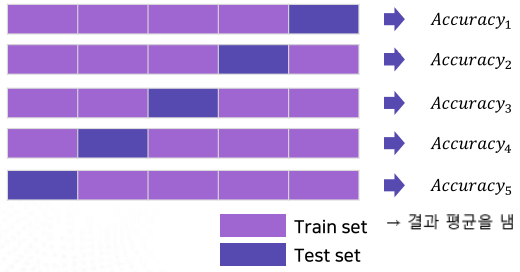

# 8-2. 그리드 서치(Grid Search)
- 최적의 매개변수를 찾는 파라미터 튜닝은 필수!
- 따라서, 다양한 값을 입력하여 찾아야 함 -> Scikit-lern은 이 과정을 쉽게 해주는 Grid Search 클래스를 가지고 있음
- 다양한 매개변수를 미리 설정해두면 간단히 최적의 값을 찾아줌 -> Grid Search CV는 그리드 서치를 교차 검정을 이용하여 수행  
ex) SVM은 머신러닝 알고리즘 중 특히 파라미터 튜닝이 중요한 알고리즘이다.
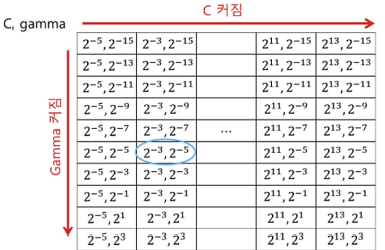

In [2]:
#필요한 모듈을 불러온다
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
import matplotlib.pyplot as plt

# 구글드라이브에서 현재 작업중인 코드로 데이터 불러오기
import pandas as pd
dataset = pd.read_csv('E:\\py_temp\\MachineLearning\\breast_cancer.csv')

# 데이터셋의 정보를 파악한다
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   clump_thickness              569 non-null    int64
 1   uniformity_of_cell_size      569 non-null    int64
 2   uniformity_of_cell_shape     569 non-null    int64
 3   marginal_adhesion            569 non-null    int64
 4   single_epithelial_cell_size  569 non-null    int64
 5   bare_nuclei                  569 non-null    int64
 6   bland_chromatin              569 non-null    int64
 7   normal_nucleoli              569 non-null    int64
 8   mitosis                      569 non-null    int64
 9   class                        569 non-null    int64
dtypes: int64(10)
memory usage: 44.6 KB


In [3]:
# 데이터 확인 후 X/y 할당
X=dataset.iloc[:,0:9]
y=dataset.iloc[:,9]

In [4]:
from sklearn.model_selection import train_test_split

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)
#test_size = 데이터 분리 비율

# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 그리드 서치를 사용한 Cost, Gamma 최적값 찾기
# 참고 : GridSearchCV 는 GridSearch + 교차검정 이다

# sklearn으로부터 그리드 서치를 불러온다
from sklearn.model_selection import GridSearchCV

# Grid 서치 Step 1.
# 파라메터 그리드 딕셔너리를 생성한다
# 미리 적용해 보고자 한느 커널, Cost, 그리고 감마 값을 설정한다
param_grid = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
              'gamma':[100,10,1,0.1,0.01,0.001],
              'C': [100,10,1,0.1,0.01,0.001]
              }


# Step 2. 앞서 생성한 딕셔너리를 기준으로 GridSearch를 실행한다
# 모든 경우의 수에 대한 학습 결과를 볼 수 있다
# GridSearchCV(적용하고 싶은 모델), 파라메터그리드딕셔너리, refit=True, verbose=2)
# refit = 최적의 하이퍼 파라메터 값을 찾았다면 해당 값을 최종적으로 적용해서 다시 훈련
# verbose = 0 (기본값) - 메세지 출력 안함
# verbose = 1 간단한 메세지 출력
# verbose = 2 상세 메세지 출력 : 하이퍼파라메터별 메세지 출력

grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose=2)
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=100, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=100, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=100, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=100, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=100, 

[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=100, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=100, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=0.01, gamma=100, kernel=poly; total time=   0.0s
[CV] END .....................C=0.01, gamma=100, kernel=poly; total time=   0.0s
[CV] END ..................C=0.01, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=100, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV] END ...................C=0.01, gamma=100, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=0.001, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.001, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.001, gamma=10, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END .....................C=0.001, gamma=10, kernel=poly; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.001, gamma=10, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=2)

In [6]:
# 최적의 파라메타값 출력
print(grid.best_estimator_)

SVC(C=1, gamma=1, random_state=42)


In [7]:
# 최적의 하이퍼 파라메터 값으로 모델 훈련하기
svc = SVC(C=1, gamma=1)

svc.fit(X_train_scaled, y_train)
prediction = svc.predict(X_test)

print("최적화 훈련 데이터 점수:", svc.score(X_train_scaled, y_train))
print("최적화 테스트 데이터 점수:", svc.score(X_test_scaled, y_test))

최적화 훈련 데이터 점수: 0.9648351648351648
최적화 테스트 데이터 점수: 0.9649122807017544


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [8]:
# 교차검정을 별도로 적용하고 싶을때
from sklearn.model_selection import cross_val_score

# 훈련세트/테스트세트로 나누지 않은 데이터로 다시 스케일링 해준다
scaler = MinMaxScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

scores = cross_val_score(svc, X_scaled, y, cv=5)

print("\n교차검증 점수:", scores)
print("점수 평균:", round(scores.mean(),3))


교차검증 점수: [0.92105263 0.93859649 0.94736842 0.98245614 0.97345133]
점수 평균: 0.953


# 8-3. 파이프라인(Pipeline)
- 파이프라인 함수: 파이썬에서의 여러 과정을 한번에 엮어서 처리해 준다.
- 파이프라인을 사용하면 코드가 줄어들 뿐만 아니라, 이해하기도 쉬워진다.
- '알고리즘을 변경'하거나 '전체 프로세스를 바꿀 때', 그리고 '여러 알고리즘을 비교할 때' 유용하게 사용 가능

In [9]:
# 기존방법
from sklearn.preprocessing import MinMaxScaler

# Step 2. 데이터 스케일링을 해준다
scaler = MinMaxScaler()
# X_train 을 기준으로 데이터 스케일링을 훈련시킨다
scaler.fit(X_train)

# scaler.fit을 기준으로 훈련데이터와 테스트 데이터를 스케일링 해준다
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3. 모델을 훈련한다
from sklearn.svm import SVC  
svc = SVC()
svc.fit(X_train_scaled,y_train)

# Step 4. 훈련결과를 살펴본다
prediction = svc.predict(X_test_scaled)
print("prediction:", prediction)
print("테스트 정확도:", svc.score(X_test_scaled, y_test))

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print(confusion)

prediction: [2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 4 4 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2 2 4
 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 4 2 2 4 2 2
 2 4 2]
테스트 정확도: 0.9649122807017544
[[82  2]
 [ 2 28]]


In [10]:
# 위와 동일한 과정을 파이프라인을 사용해서 진행해 보자
# 파이프라인을 이용한 분석
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC  

# 파이프라인을 정의해 준다
# 파이프라인을 이용해서 데이터 스케일링과 SVM 객체 생성을 한 줄에 포함하였다
# 데이터 스케일러를 'scaler'라는 이름으로, 
# SVM 객체를 "svm"으로 할당했다
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm",SVC())])

# 정제되지 않은 데이터를 넣어준다
pipe.fit(X_train, y_train)

print("예측결과:", pipe.predict(X_test))
print("정확도:", pipe.score(X_test, y_test))

# 분석과정이 매우 단순화 되었다

예측결과: [2 2 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 2 4 4 2 4 2 4 2 2 2 4 4 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2 2 4
 2 4 2 4 2 2 4 4 4 2 2 2 2 2 2 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 4 2 2 4 2 2
 2 4 2]
정확도: 0.9649122807017544


In [11]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print(confusion)

[[82  2]
 [ 2 28]]
